In [1]:
import torch
import time
import gc
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../cnn')
from commons import full_inference_e2e, inc_inference_e2e
from vgg16 import VGG16
from vgg16_inc import IncrementalVGG16

image_file_path = "../cnn/dog_resized.jpg"
interested_logit_index = 208

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
torch.cuda.synchronize()
prev_time = time.time()
outputs_full = full_inference_e2e(VGG16, image_file_path, 4, 1, interested_logit_index,
                                  batch_size=256)
torch.cuda.synchronize()
full_inference_time = time.time() - prev_time
print("Full Inference Time: " + str(full_inference_time))

#np.savetxt('temp', outputs_full)

Full Inference Time: 104.961580038


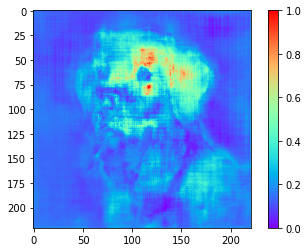

In [12]:
x = outputs_full
xmax, xmin = x.max(), x.min()
x = 1 - (x - xmin)/(xmax - xmin)

plt.imshow(x, cmap=plt.cm.rainbow, interpolation='none')
plt.colorbar()

In [3]:
gc.collect()
torch.cuda.empty_cache()

Incremental Inference Time: 25.2676889896


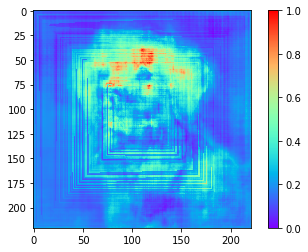

In [16]:
torch.cuda.synchronize()
prev_time = time.time()
outputs_inc = inc_inference_e2e(IncrementalVGG16, image_file_path, 4, 1, interested_logit_index,
                                batch_size=128, beta=0.4999)
torch.cuda.synchronize()
inc_inference_time = time.time() - prev_time
print("Incremental Inference Time: " + str(inc_inference_time))

x = outputs_inc
xmax, xmin = x.max(), x.min()
x = 1 - (x - xmin)/(xmax - xmin)

plt.imshow(x, cmap=plt.cm.rainbow, interpolation='none')
plt.colorbar()

In [17]:
outputs_full = np.loadtxt('temp')
temp = np.abs(np.around(outputs_full, decimals=3) - np.around(outputs_inc, decimals=3))

In [ ]:
plt.imshow(temp, cmap=plt.cm.rainbow, interpolation='none')
plt.colorbar()